In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os

In [3]:
!unzip CollectionDataset

Archive:  CollectionDataset.zip
   creating: CollectionDataset/0.15_Speed_OB/
  inflating: CollectionDataset/0.15_Speed_OB/03-06_14-51_GT.npy  
  inflating: CollectionDataset/0.15_Speed_OB/03-06_14-51_IMU.npy  
  inflating: CollectionDataset/0.15_Speed_OB/03-06_14-51_RssOWP.npy  
   creating: CollectionDataset/0.15_Speed_withoutOb/
  inflating: CollectionDataset/0.15_Speed_withoutOb/03-05_14-53_GT.npy  
  inflating: CollectionDataset/0.15_Speed_withoutOb/03-05_14-53_IMU.npy  
  inflating: CollectionDataset/0.15_Speed_withoutOb/03-05_14-53_RssOWP.npy  
   creating: CollectionDataset/0.275_Speed_OB/
  inflating: CollectionDataset/0.275_Speed_OB/03-06_14-31_GT.npy  
  inflating: CollectionDataset/0.275_Speed_OB/03-06_14-31_IMU.npy  
  inflating: CollectionDataset/0.275_Speed_OB/03-06_14-31_RssOWP.npy  
   creating: CollectionDataset/0.275_Speed_withoutOb/
  inflating: CollectionDataset/0.275_Speed_withoutOb/03-05_14-13_GT.npy  
  inflating: CollectionDataset/0.275_Speed_withoutOb/03-05_14

In [10]:
# Get .npy file based on directory and type
def getNpy(type, dir):
  # Regex check
  pattern = re.compile(rf".*{re.escape(type)}\.npy$")
  # Find file
  matching_file = next((f for f in os.listdir(dir) if pattern.match(f)), None)
  full_path = os.path.join(dir, matching_file)
  # Load
  return np.load(full_path)

# All paths in dataset
paths = {
    "0.15 Obstacle": "/content/CollectionDataset/0.15_Speed_OB",
    "0.275 Obstacle": "/content/CollectionDataset/0.275_Speed_OB",
    "0.45 Obstacle": "/content/CollectionDataset/0.45_Speed_OB",
    "0.15 No Obstacle": "/content/CollectionDataset/0.15_Speed_withoutOb",
    "0.275 No Obstacle": "/content/CollectionDataset/0.275_Speed_withoutOb",
    "0.45 No Obstacle": "/content/CollectionDataset/0.45_Speed_withoutOb"
}

# Create dataset map including speeds, obstacles and their respective dataframes
datasets = {}
for i in paths:
  datasets[i] = {}

  gtNP = getNpy('GT', paths[i])
  datasets[i]['GT'] = pd.DataFrame(gtNP, columns=["Timestamp", "cx", "cy", "cz", "r11", "r12", "r13", "r21", "r22", "r23", "r31", "r32", "r33"])

  imuNP = getNpy('IMU', paths[i])
  datasets[i]['IMU'] = pd.DataFrame(imuNP, columns=["Timestamp", "ax", "ay", "az", "gx", "gy", "gz"])

  rssNP = getNpy('RssOWP', paths[i])
  datasets[i]['RSS'] = pd.DataFrame(rssNP, columns=["Timestamp", "rss1", "rss2", "rss3", "rss4"])


=== EDA for condition: 0.15 Obstacle ===

Ground Truth (GT) summary:
           Timestamp             cx             cy             cz  \
count  134469.000000  134469.000000  134469.000000  134469.000000   
mean      403.598007       4.376181       1.880422       0.231030   
std       232.474260       1.337648       1.048400       0.007827   
min         1.006883       2.271520       0.220337       0.216789   
25%       202.369883       3.124351       0.963469       0.225227   
50%       403.602883       4.480035       1.593031       0.227786   
75%       604.959883       5.619180       2.929534       0.237373   
max       806.292883       6.500542       3.716442       0.249527   

                 r11            r12            r13            r21  \
count  134469.000000  134469.000000  134469.000000  134469.000000   
mean        0.101928       0.018654       0.008095      -0.018644   
std         0.765773       0.634616       0.007652       0.634577   
min        -0.999998      -1.000

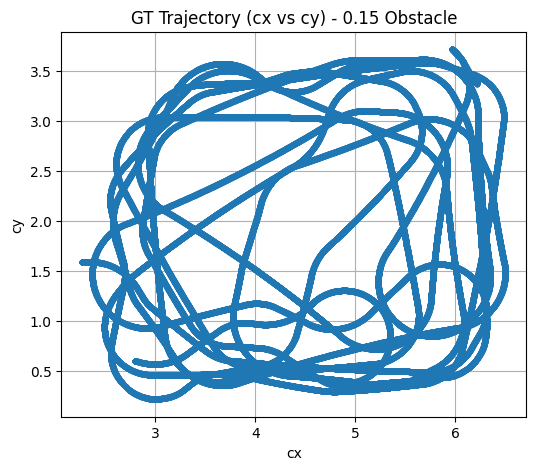


IMU summary:
           Timestamp             ax             ay             az  \
count  161031.000000  161031.000000  161031.000000  161031.000000   
mean      402.527911      -0.006743       0.007291       1.000160   
std       232.523352       0.031537       0.033499       0.013499   
min         0.000000      -0.581055      -0.312988       0.881836   
25%       201.278500      -0.020020      -0.009766       0.993164   
50%       402.170000      -0.007812       0.004395       1.000000   
75%       604.076500       0.007812       0.024902       1.006836   
max       805.285000       0.837402       0.663574       1.148926   

                  gx             gy             gz  
count  161031.000000  161031.000000  161031.000000  
mean        0.007316      -0.006980       0.625927  
std         0.813647       0.596081      10.264450  
min       -19.714355     -12.084961     -22.094727  
25%        -0.366211      -0.244141       0.000000  
50%         0.000000       0.000000       0.36

<Figure size 1000x400 with 0 Axes>

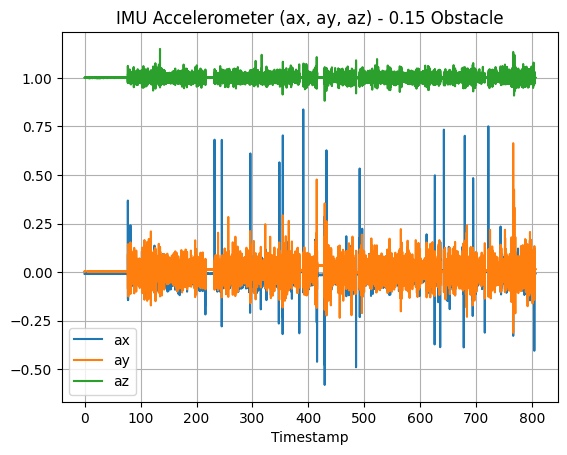

<Figure size 1000x400 with 0 Axes>

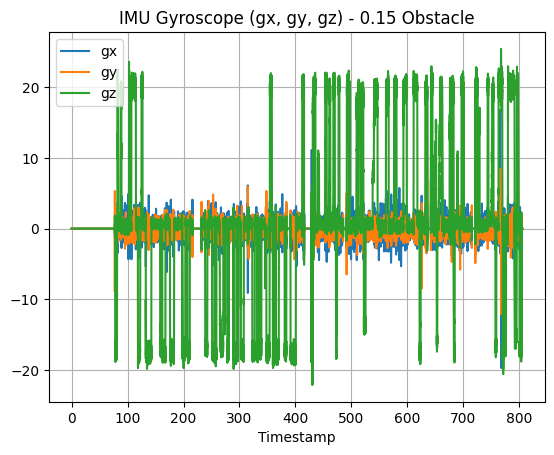


RSS summary:
          Timestamp          rss1          rss2          rss3          rss4
count  20365.000000  20365.000000  20365.000000  20365.000000  20365.000000
mean     402.189258      0.051327      0.045065      0.041012      0.035110
std      233.434211      0.035337      0.031473      0.024378      0.018289
min        0.012000      0.006469      0.005621      0.006512      0.005899
25%      198.998000      0.021831      0.019254      0.021275      0.019315
50%      401.519000      0.038444      0.032947      0.035021      0.030833
75%      605.769000      0.075498      0.064646      0.054694      0.048770
max      805.258000      0.142821      0.126301      0.111293      0.078091
Missing values: {'Timestamp': 0, 'rss1': 0, 'rss2': 0, 'rss3': 0, 'rss4': 0}
Shape: (20365, 5)
Timestamps range: 0.012000000002444722 to 805.2580000000016


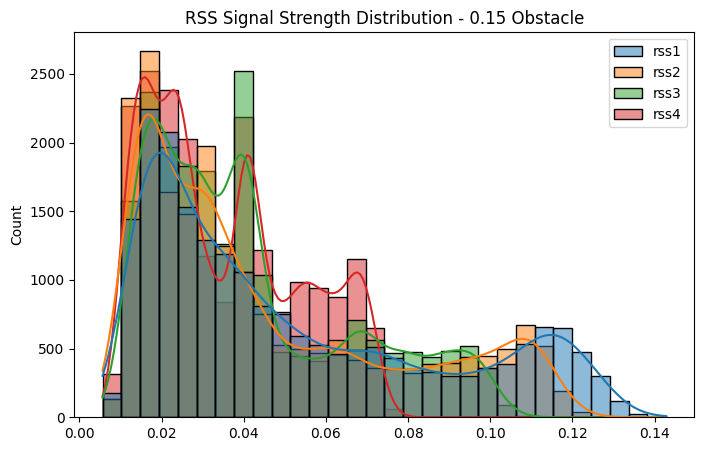



=== EDA for condition: 0.275 Obstacle ===

Ground Truth (GT) summary:
           Timestamp             cx             cy             cz  \
count  134513.000000  134513.000000  134513.000000  134513.000000   
mean      402.934710       4.408589       1.836344       0.230333   
std       232.671050       1.306524       0.935809       0.006844   
min         0.000046       2.284955       0.350322       0.219606   
25%       201.429046       3.212802       1.163988       0.225538   
50%       402.931046       4.468949       1.610294       0.227830   
75%       604.428046       5.672079       2.687767       0.235207   
max       806.036046       6.457024       3.606729       0.249378   

                 r11            r12            r13            r21  \
count  134513.000000  134513.000000  134513.000000  134513.000000   
mean        0.057414      -0.089412       0.007963       0.089392   
std         0.735126       0.669469       0.007377       0.669431   
min        -1.000000      -1.0

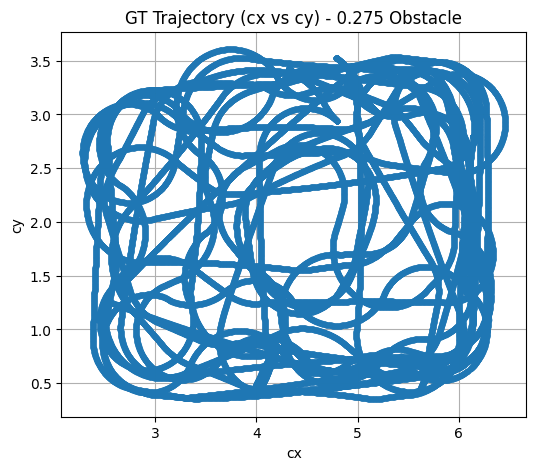


IMU summary:
           Timestamp             ax             ay             az  \
count  161238.000000  161238.000000  161238.000000  161238.000000   
mean      402.917648      -0.007537       0.007937       1.000136   
std       232.631732       0.049955       0.053223       0.027195   
min         0.000000      -0.570312      -0.388672       0.773926   
25%       201.448250      -0.029785      -0.017090       0.986328   
50%       402.905000      -0.008789       0.003418       1.000000   
75%       604.361000       0.015137       0.032715       1.013672   
max       806.033000       0.809570       0.645020       1.238281   

                  gx             gy             gz  
count  161238.000000  161238.000000  161238.000000  
mean        0.059733      -0.054431       4.301217  
std         1.325866       1.042623      22.174150  
min       -17.395020     -11.840820     -42.541504  
25%        -0.549316      -0.610352       0.000000  
50%         0.000000       0.000000       0.67

<Figure size 1000x400 with 0 Axes>

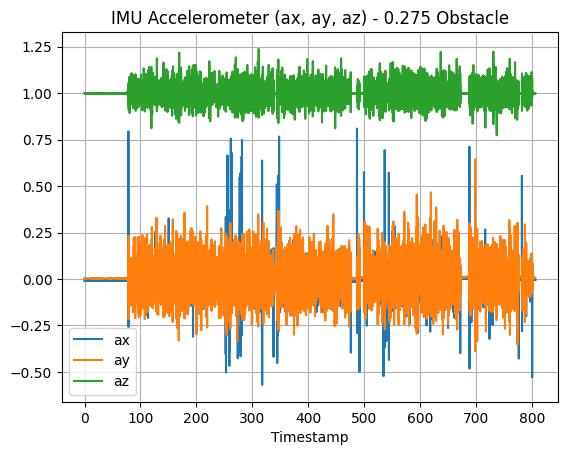

<Figure size 1000x400 with 0 Axes>

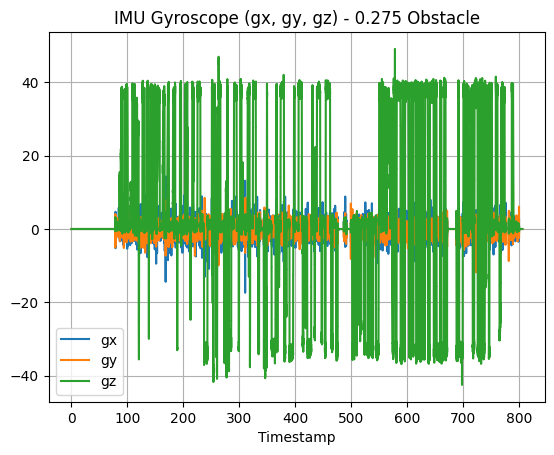


RSS summary:
          Timestamp          rss1          rss2          rss3          rss4
count  20302.000000  20302.000000  20302.000000  20302.000000  20302.000000
mean     400.801608      0.051783      0.047246      0.041428      0.035325
std      232.511127      0.034548      0.032497      0.024482      0.018057
min        0.007000      0.006643      0.006466      0.005752      0.005464
25%      199.607000      0.022253      0.018722      0.021027      0.018976
50%      399.079500      0.040825      0.036057      0.035982      0.030720
75%      601.702750      0.076266      0.071290      0.055597      0.050717
max      806.010000      0.149597      0.128434      0.108467      0.078282
Missing values: {'Timestamp': 0, 'rss1': 0, 'rss2': 0, 'rss3': 0, 'rss4': 0}
Shape: (20302, 5)
Timestamps range: 0.006999999997788109 to 806.010000000002


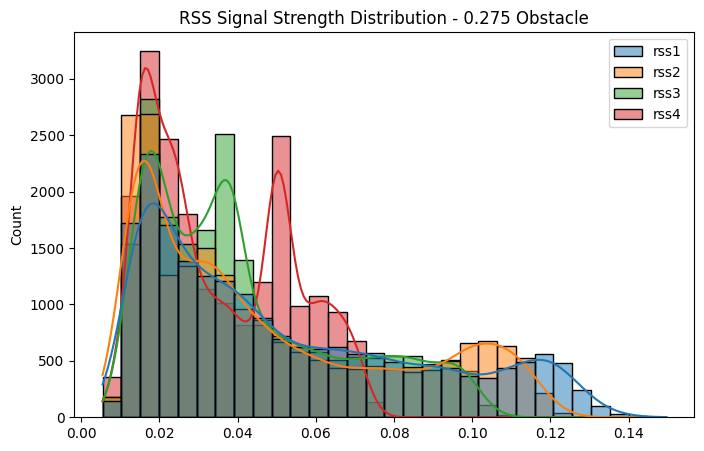



=== EDA for condition: 0.45 Obstacle ===

Ground Truth (GT) summary:
          Timestamp            cx            cy            cz           r11  \
count  91423.000000  91423.000000  91423.000000  91423.000000  91423.000000   
mean     273.869679      4.412684      1.867148      0.230766      0.128320   
std      158.187085      1.354555      0.964022      0.007325      0.720929   
min        0.004982      2.282955      0.273715      0.219260     -1.000000   
25%      136.863982      3.125969      1.169986      0.225247     -0.530728   
50%      273.763982      4.546785      1.573169      0.228118      0.110629   
75%      410.878982      5.770421      2.813976      0.236649      0.960848   
max      547.996982      6.392280      3.607714      0.249453      0.999994   

                r12           r13           r21           r22           r23  \
count  91423.000000  91423.000000  91423.000000  91423.000000  91423.000000   
mean       0.051640      0.009745     -0.051644      0.1284

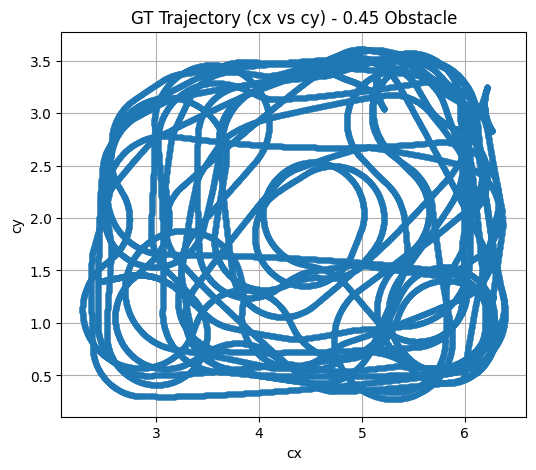


IMU summary:
           Timestamp             ax             ay             az  \
count  109648.000000  109648.000000  109648.000000  109648.000000   
mean      274.002653      -0.007406       0.010248       0.999804   
std       158.199680       0.058422       0.070833       0.038431   
min         0.000000      -0.601074      -0.587402       0.454102   
25%       136.990750      -0.029785      -0.020996       0.983887   
50%       273.979500      -0.008789       0.007812       1.000000   
75%       410.999250       0.012207       0.043457       1.015137   
max       548.004000       0.864258       0.609863       2.805176   

                  gx             gy             gz  
count  109648.000000  109648.000000  109648.000000  
mean        0.111414      -0.082516       6.378843  
std         1.811682       1.293483      27.234374  
min       -24.902344     -19.653320     -49.499512  
25%        -0.610352      -0.671387       0.000000  
50%         0.000000       0.000000       1.34

<Figure size 1000x400 with 0 Axes>

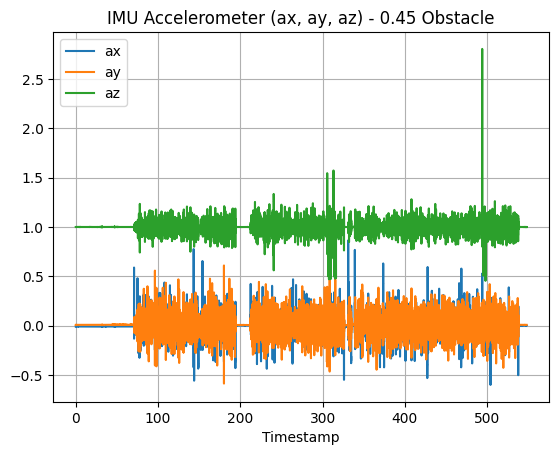

<Figure size 1000x400 with 0 Axes>

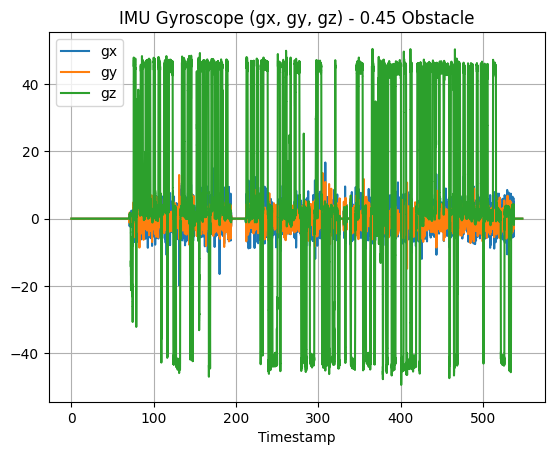


RSS summary:
          Timestamp          rss1          rss2          rss3          rss4
count  13824.000000  13824.000000  13824.000000  13824.000000  13824.000000
mean     273.922349      0.053055      0.046640      0.040048      0.034494
std      158.123440      0.037078      0.032525      0.024132      0.017988
min        0.000000      0.006533      0.007148      0.006750      0.006052
25%      137.043750      0.021526      0.018867      0.020811      0.017794
50%      274.063000      0.040212      0.035261      0.035754      0.030522
75%      410.767250      0.080207      0.069481      0.050505      0.048684
max      547.972000      0.143411      0.124765      0.111252      0.077958
Missing values: {'Timestamp': 0, 'rss1': 0, 'rss2': 0, 'rss3': 0, 'rss4': 0}
Shape: (13824, 5)
Timestamps range: 0.0 to 547.9720000000016


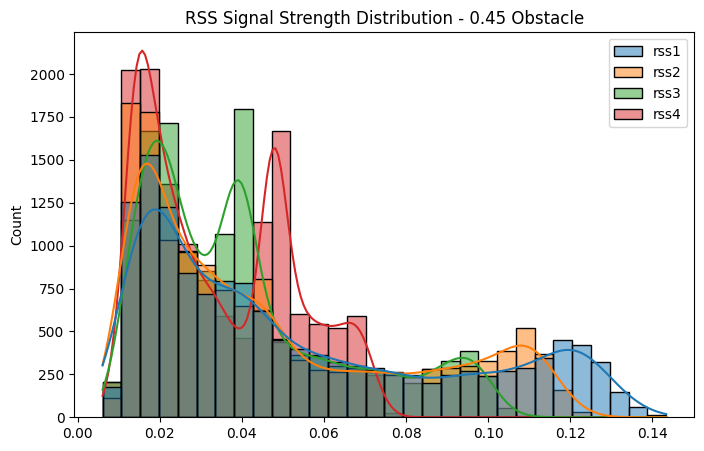



=== EDA for condition: 0.15 No Obstacle ===

Ground Truth (GT) summary:
           Timestamp             cx             cy             cz  \
count  163245.000000  163245.000000  163245.000000  163245.000000   
mean      489.595033       4.825720       1.782149       0.230523   
std       282.334210       1.142944       0.910463       0.006173   
min         0.447541       2.205437       0.322543       0.218373   
25%       245.281541       3.879630       1.061602       0.226046   
50%       489.660541       5.015834       1.679619       0.228007   
75%       734.086541       5.936073       2.665947       0.235314   
max       978.497541       6.424250       3.613559       0.249464   

                 r11            r12            r13            r21  \
count  163245.000000  163245.000000  163245.000000  163245.000000   
mean       -0.029729      -0.139093       0.008370       0.139067   
std         0.678217       0.720881       0.007568       0.720813   
min        -1.000000      -1

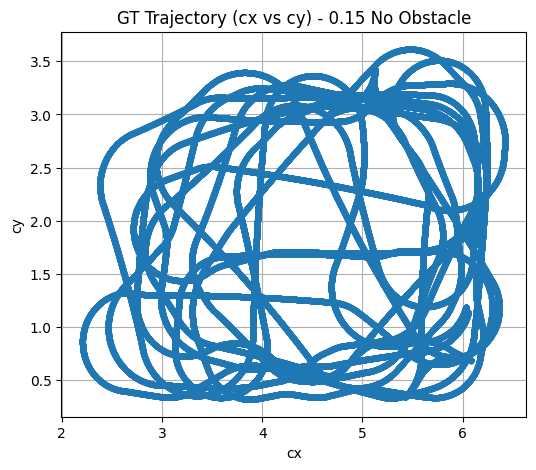


IMU summary:
           Timestamp             ax             ay             az  \
count  195350.000000  195350.000000  195350.000000  195350.000000   
mean      488.372723      -0.006501       0.006394       1.000014   
std       282.197243       0.031515       0.033157       0.013517   
min         0.000000      -0.545410      -0.291504       0.838379   
25%       244.048250      -0.020020      -0.010254       0.993164   
50%       488.104000      -0.004883       0.006348       1.000000   
75%       732.175750       0.006348       0.022949       1.006836   
max       978.049000       0.764648       0.270508       1.174805   

                  gx             gy             gz  
count  195350.000000  195350.000000  195350.000000  
mean       -0.003084      -0.002366      -0.948244  
std         0.759927       0.568804      10.781799  
min        -7.690430      -7.995605     -22.644043  
25%        -0.366211      -0.244141      -0.366211  
50%         0.000000       0.000000       0.18

<Figure size 1000x400 with 0 Axes>

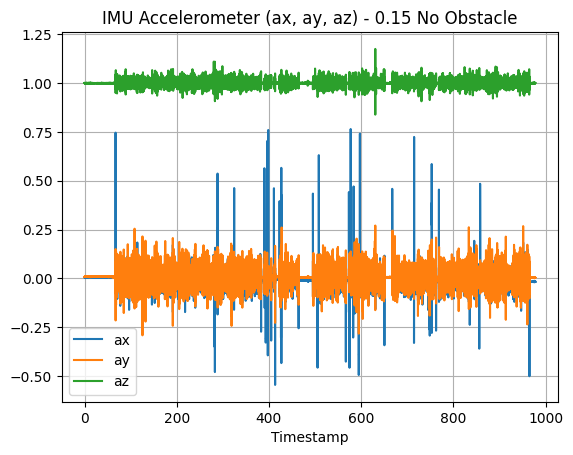

<Figure size 1000x400 with 0 Axes>

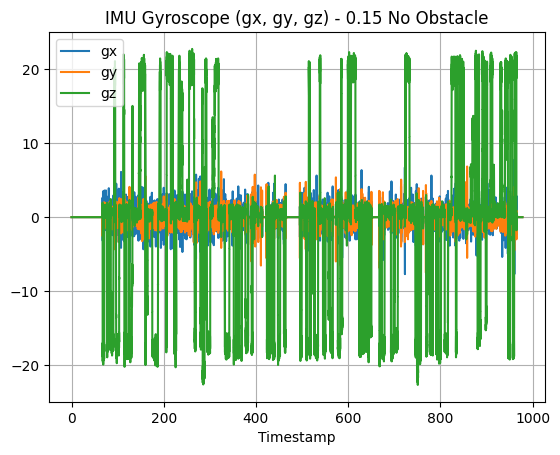


RSS summary:
          Timestamp          rss1          rss2          rss3          rss4
count  24734.000000  24734.000000  24734.000000  24734.000000  24734.000000
mean     489.556785      0.059063      0.058505      0.038883      0.033751
std      283.406492      0.032709      0.032976      0.024362      0.017825
min        0.000000      0.007364      0.008363      0.007964      0.009470
25%      245.184000      0.031790      0.029698      0.019893      0.019174
50%      488.161000      0.052832      0.049197      0.029125      0.027601
75%      735.355000      0.081581      0.090077      0.052231      0.047070
max      978.018000      0.145563      0.126749      0.109254      0.078598
Missing values: {'Timestamp': 0, 'rss1': 0, 'rss2': 0, 'rss3': 0, 'rss4': 0}
Shape: (24734, 5)
Timestamps range: 0.0 to 978.0180000000037


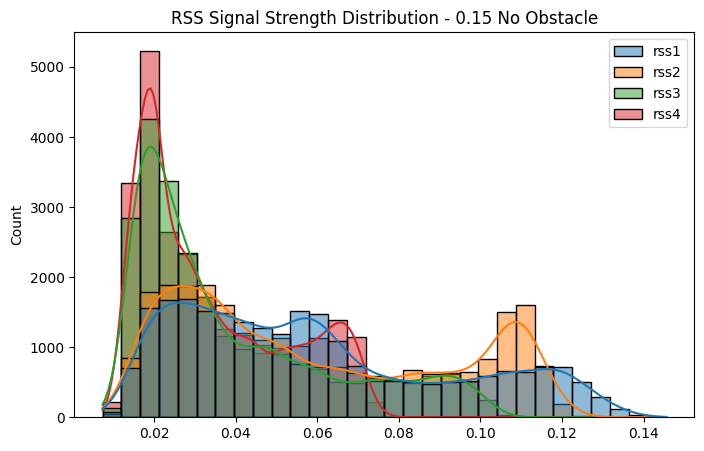



=== EDA for condition: 0.275 No Obstacle ===

Ground Truth (GT) summary:
           Timestamp             cx             cy             cz  \
count  100040.000000  100040.000000  100040.000000  100040.000000   
mean      300.174915       4.489005       1.770733       0.229919   
std       173.185395       1.321640       0.889956       0.006085   
min         0.251243       2.205292       0.272492       0.219320   
25%       150.026243       3.294911       1.118043       0.225804   
50%       300.342243       4.603789       1.629764       0.227928   
75%       450.177993       5.607541       2.430361       0.233543   
max       599.936243       6.435476       3.682062       0.249010   

                 r11            r12            r13            r21  \
count  100040.000000  100040.000000  100040.000000  100040.000000   
mean        0.143258      -0.101577       0.006718       0.101560   
std         0.745719       0.642633       0.007071       0.642578   
min        -0.999999      -

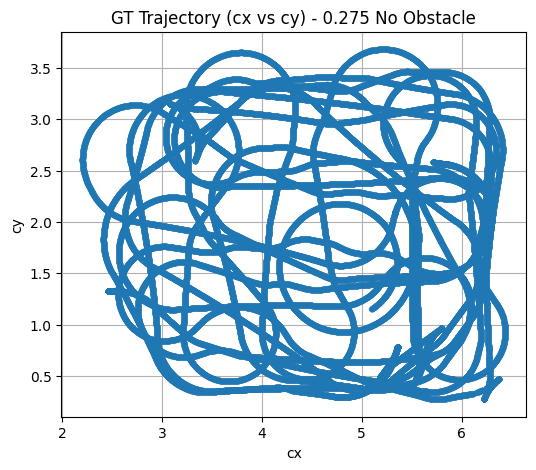


IMU summary:
           Timestamp             ax             ay             az  \
count  119989.000000  119989.000000  119989.000000  119989.000000   
mean      299.845469      -0.007991       0.005788       1.000040   
std       173.113876       0.048342       0.052489       0.026797   
min         0.000000      -0.583984      -1.799316       0.469238   
25%       149.918000      -0.026855      -0.017090       0.988281   
50%       299.838000      -0.010742       0.006836       1.000000   
75%       449.758000       0.011719       0.027832       1.011719   
max       599.683000       0.864258       0.703125       2.718750   

                  gx             gy             gz  
count  119989.000000  119989.000000  119989.000000  
mean       -0.030548      -0.005233      -1.431748  
std         1.382867       1.033271      20.616141  
min       -40.039062     -19.592285     -45.410156  
25%        -0.549316      -0.488281      -7.446289  
50%         0.000000       0.000000       0.00

<Figure size 1000x400 with 0 Axes>

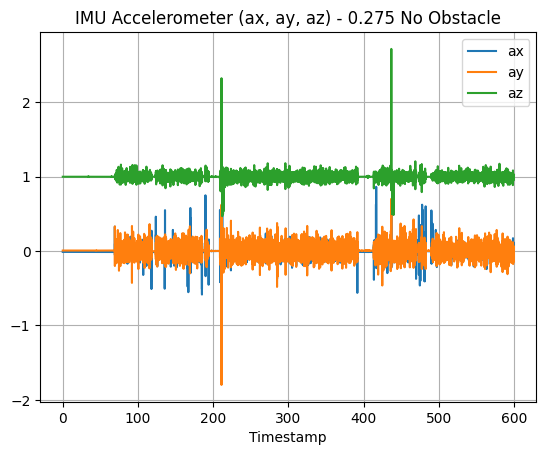

<Figure size 1000x400 with 0 Axes>

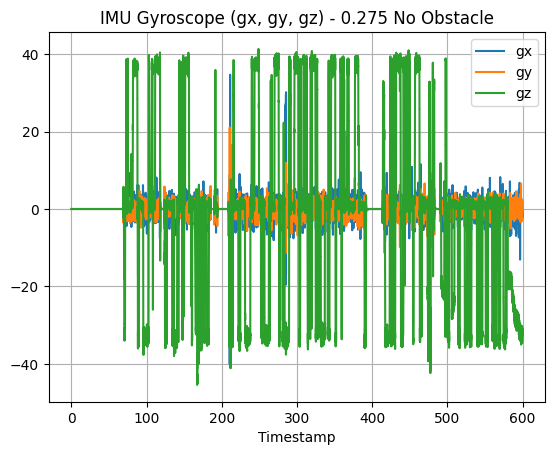


RSS summary:
          Timestamp          rss1          rss2          rss3          rss4
count  15195.000000  15195.000000  15195.000000  15195.000000  15195.000000
mean     299.269763      0.051985      0.051377      0.041158      0.035244
std      173.309321      0.032598      0.032487      0.024570      0.016895
min        0.000000      0.006748      0.008418      0.009344      0.009369
25%      148.828500      0.025369      0.021664      0.020678      0.020488
50%      298.864000      0.041940      0.042528      0.035812      0.031123
75%      449.876500      0.076128      0.075519      0.054056      0.048587
max      599.675000      0.142695      0.125101      0.107949      0.077236
Missing values: {'Timestamp': 0, 'rss1': 0, 'rss2': 0, 'rss3': 0, 'rss4': 0}
Shape: (15195, 5)
Timestamps range: 0.0 to 599.6750000000029


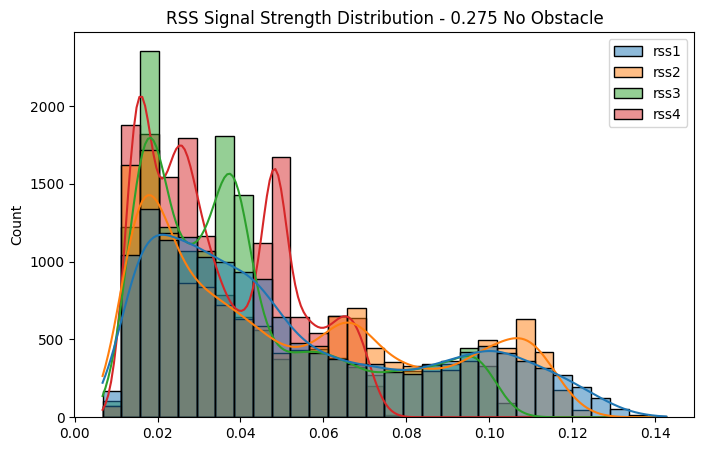



=== EDA for condition: 0.45 No Obstacle ===

Ground Truth (GT) summary:
           Timestamp             cx             cy             cz  \
count  122034.000000  122034.000000  122034.000000  122034.000000   
mean      365.834243       4.403071       1.736958       0.229935   
std       210.982982       1.187517       0.917343       0.006085   
min         0.402296       2.273305       0.283160       0.219790   
25%       183.145796       3.307791       0.878073       0.225499   
50%       365.841796       4.351690       1.543404       0.227896   
75%       548.564296       5.531521       2.536213       0.234035   
max       731.277296       6.524443       3.502387       0.248623   

                 r11            r12            r13            r21  \
count  122034.000000  122034.000000  122034.000000  122034.000000   
mean        0.063012      -0.042164       0.009035       0.042147   
std         0.750890       0.655966       0.007078       0.655918   
min        -1.000000      -1

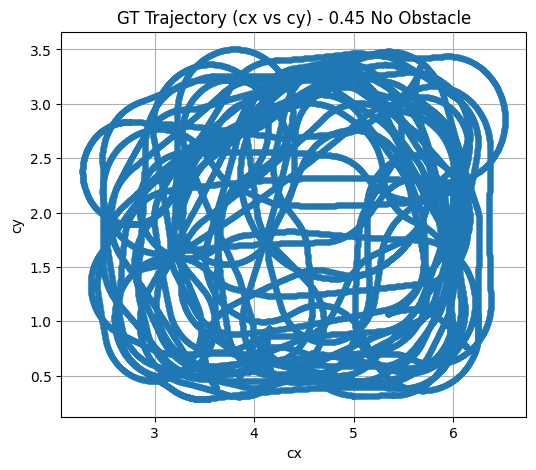


IMU summary:
           Timestamp             ax             ay             az  \
count  146193.000000  146193.000000  146193.000000  146193.000000   
mean      365.394136      -0.007138       0.006549       0.999908   
std       211.008633       0.063261       0.069733       0.039381   
min         0.001000      -0.959961      -1.888672       0.461914   
25%       182.659000      -0.030762      -0.026367       0.983887   
50%       365.337000      -0.007324       0.006348       1.000000   
75%       548.224000       0.014648       0.038574       1.015625   
max       730.873000       0.882324       0.607422       2.815430   

                  gx             gy             gz  
count  146193.000000  146193.000000  146193.000000  
mean        0.012545      -0.007704       0.246231  
std         1.762202       1.282054      26.685609  
min       -30.212402     -16.113281     -50.964355  
25%        -0.732422      -0.610352     -11.840820  
50%         0.000000       0.000000       0.42

<Figure size 1000x400 with 0 Axes>

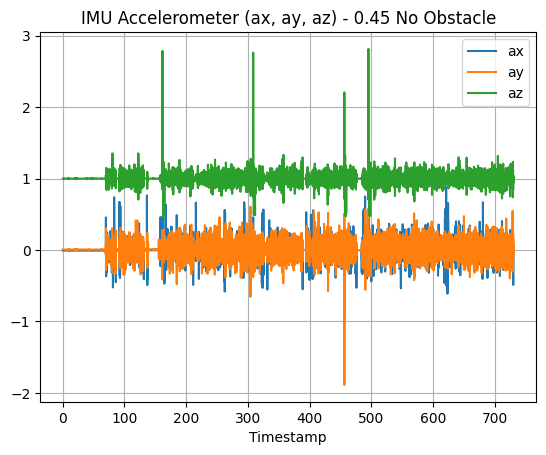

<Figure size 1000x400 with 0 Axes>

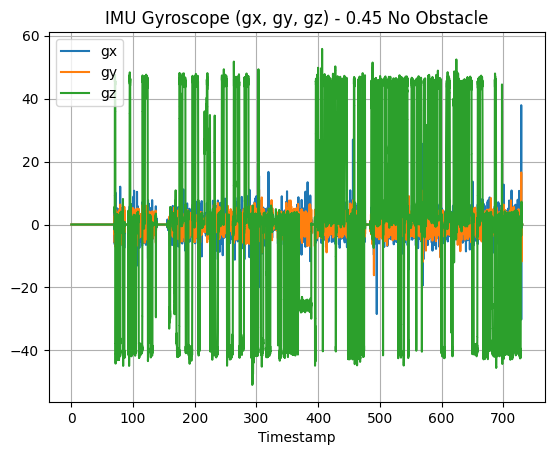


RSS summary:
          Timestamp          rss1          rss2          rss3          rss4
count  19359.000000  19359.000000  19359.000000  19359.000000  19359.000000
mean     376.554667      0.049882      0.049825      0.043694      0.038272
std      213.622068      0.031680      0.032193      0.024373      0.017936
min        0.000000      0.007704      0.008826      0.010113      0.009539
25%      190.910500      0.024398      0.022806      0.024157      0.021535
50%      383.957000      0.040264      0.037871      0.036535      0.034070
75%      564.543500      0.067713      0.073262      0.058340      0.055199
max      730.846000      0.142887      0.128093      0.107644      0.078539
Missing values: {'Timestamp': 0, 'rss1': 0, 'rss2': 0, 'rss3': 0, 'rss4': 0}
Shape: (19359, 5)
Timestamps range: 0.0 to 730.8459999999977


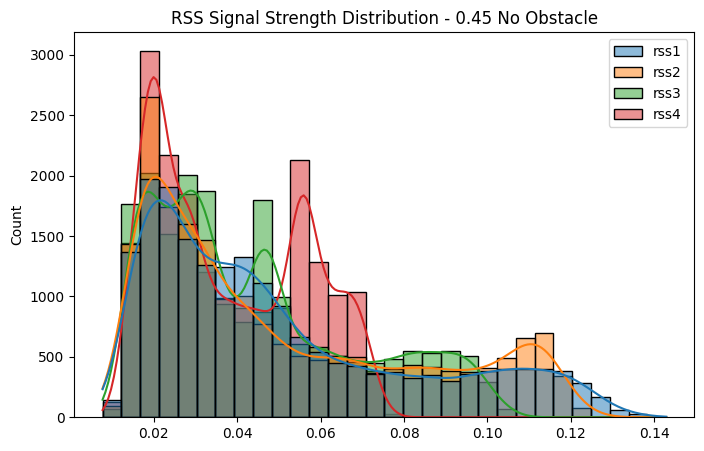

In [15]:
# Per speed / obstacle condition perform eda
def perConditionEDA(datasets):
    for condition, dataDict in datasets.items():
        print(f"\n=== EDA for condition: {condition} ===")

        # Ground Truth
        dfGt = dataDict['GT']

        print("\nGround Truth (GT) summary:")
        print(dfGt.describe())

        print("Missing values:", dfGt.isna().sum().to_dict())
        print(f"Shape: {dfGt.shape}")
        print(f"Timestamps range: {dfGt['Timestamp'].min()} to {dfGt['Timestamp'].max()}")

        # Plot 2D trajectory cx vs cy
        plt.figure(figsize=(6,5))
        plt.plot(dfGt['cx'], dfGt['cy'], marker='.', linestyle='-', alpha=0.7)
        plt.title(f"GT Trajectory (cx vs cy) - {condition}")
        plt.xlabel('cx')
        plt.ylabel('cy')
        plt.grid(True)
        plt.show()

        # IMU (acc, gyro)
        dfImu = dataDict['IMU']
        print("\nIMU summary:")
        print(dfImu.describe())

        print("Missing values:", dfImu.isna().sum().to_dict())
        print(f"Shape: {dfImu.shape}")
        print(f"Timestamps range: {dfImu['Timestamp'].min()} to {dfImu['Timestamp'].max()}")

        # Plot acc data
        plt.figure(figsize=(10,4))
        dfImu.plot(x='Timestamp', y=['ax', 'ay', 'az'])
        plt.title(f"IMU Accelerometer (ax, ay, az) - {condition}")
        plt.grid(True)
        plt.show()

        # Plot gyro data
        plt.figure(figsize=(10,4))
        dfImu.plot(x='Timestamp', y=['gx', 'gy', 'gz'])
        plt.title(f"IMU Gyroscope (gx, gy, gz) - {condition}")
        plt.grid(True)
        plt.show()

        # RSS
        dfRss = dataDict['RSS']
        print("\nRSS summary:")
        print(dfRss.describe())

        print("Missing values:", dfRss.isna().sum().to_dict())
        print(f"Shape: {dfRss.shape}")
        print(f"Timestamps range: {dfRss['Timestamp'].min()} to {dfRss['Timestamp'].max()}")

        # Plot RSS histogram (check for skew)
        plt.figure(figsize=(8,5))
        sns.histplot(dfRss[['rss1', 'rss2', 'rss3', 'rss4']], kde=True, bins=30)
        plt.title(f"RSS Signal Strength Distribution - {condition}")
        plt.show()

        print("\n" + "="*40)

perConditionEDA(datasets)
